In [1]:
# !pip install virtualenv
# !virtualenv /content/notebooks/cs5228
# ! source /content/notebooks/cs5228/bin/activate && pip install pandas plotly scikit-learn
import os, sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/notebooks/cs5228/lib/python3.10/site-packages')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans

In [4]:
DATA_DIR = 'E:/NUS/CS5228/project'
train = os.path.join(DATA_DIR, 'train1.csv')
test = os.path.join(DATA_DIR, 'test1.csv')
stock = 'E:/NUS/CS5228/project/sg-stock-prices.csv/sg-stock-prices.csv'
coe = os.path.join(DATA_DIR, 'sg-coe-prices.csv')
train_df, test_df, stock_df, coe_df= pd.read_csv(train), pd.read_csv(test), pd.read_csv(stock), pd.read_csv(coe)

## Check null data

In [24]:
train_df.isnull().any()

rent_approval_date     False
town                   False
block                  False
street_name            False
flat_type              False
flat_model             False
floor_area_sqm         False
furnished              False
lease_commence_date    False
latitude               False
longitude              False
elevation              False
subzone                False
planning_area          False
region                 False
monthly_rent           False
dtype: bool

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   60000 non-null  object 
 1   town                 60000 non-null  object 
 2   block                60000 non-null  object 
 3   street_name          60000 non-null  object 
 4   flat_type            60000 non-null  object 
 5   flat_model           60000 non-null  object 
 6   floor_area_sqm       60000 non-null  float64
 7   furnished            60000 non-null  object 
 8   lease_commence_date  60000 non-null  int64  
 9   latitude             60000 non-null  float64
 10  longitude            60000 non-null  float64
 11  elevation            60000 non-null  float64
 12  subzone              60000 non-null  object 
 13  planning_area        60000 non-null  object 
 14  region               60000 non-null  object 
 15  monthly_rent         60000 non-null 

In [26]:
train_df.furnished.unique()  # removed ?

array(['yes'], dtype=object)

## preprocessing

1. Convert rent_approval_date and lease_commence_data to datetime format
2. make other string entry to be lower case

In [27]:
approval_date_f = '%Y-%m'
commence_f = '%Y'

def clean_data(df):
    df = df.copy()
    string_attr = ['region', 'town', 'planning_area', 'subzone', 'town', 'block', 'street_name', 'flat_type', 'flat_model']

    for string_data in string_attr:
        df[string_data] = df[string_data].map(lambda x: x.lower())
    # df.rent_approval_date = df.rent_approval_date.map(lambda x: datetime.strptime(x, '%Y-%M').timestamp())
    # df.lease_commence_date = df.lease_commence_date.map(lambda x: datetime.strptime(str(x), '%Y').timestamp())
    df.flat_type = df.flat_type.map(lambda x: x if x.split(' ') == 1 else '-'.join(x.split(' '))) # normalize the flat type
    df = df.drop(columns=['furnished', 'elevation'])
    return df

def process_data(df):
  df = df.copy()
  df['age'] = df.apply(lambda x: (datetime.strptime(x['rent_approval_date'], approval_date_f) - datetime.strptime(str(x['lease_commence_date']), commence_f)).days, axis=1)
  return df

In [28]:
train_df_cleaned = clean_data(train_df)
train_df_cleaned = process_data(train_df_cleaned)
train_df_cleaned

rent_approval_date             town block            street_name  \
0                2021-09      jurong east   257  jurong east street 24   
1                2022-05            bedok   119       bedok north road   
2                2022-10        toa payoh   157     lorong 1 toa payoh   
3                2021-08        pasir ris   250    pasir ris street 21   
4                2022-11  kallang/whampoa    34           whampoa west   
...                  ...              ...   ...                    ...   
59995            2021-09       ang mo kio   441   ang mo kio avenue 10   
59996            2023-04      bukit merah   95a         henderson road   
59997            2022-06         tampines  862a     tampines street 83   
59998            2023-01            bedok    67     bedok sth avenue 3   
59999            2023-02       ang mo kio   445   ang mo kio avenue 10   

       flat_type      flat_model  floor_area_sqm  lease_commence_date  \
0         3-room  new generation            67.0                 1983   
1         4-room  new generation            92.0                 1978   
2         3-room        improved            67.0                 1971   
3      executive       apartment           149.0                 1993   
4         3-room        improved            68.0                 1972   
...          ...             ...             ...                  ...   
59995     3-room  new generation            67.0                 1979   
59996     4-room         model a            83.0                 2019   
59997     5-room        improved           122.0                 1988   
59998     5-room        standard           123.0                 1977   
59999     3-room  new generation            67.0                 1979   

       latitude   longitude            subzone planning_area  \
0      1.344518  103.738630         yuhua east   jurong east   
1      1.330186  103.938717        bedok north         bedok   
2      1.332242  103.845643  toa payoh central     toa payoh   
3      1.370239  103.962894    pasir ris drive     pasir ris   
4      1.320502  103.863341          bendemeer       kallang   
...         ...         ...                ...           ...   
59995  1.366050  103.854168         chong boon    ang mo kio   
59996  1.286493  103.821434     henderson hill   bukit merah   
59997  1.355064  103.936507      tampines west      tampines   
59998  1.318974  103.944076        bedok south         bedok   
59999  1.366980  103.855718         chong boon    ang mo kio   

                  region  monthly_rent    age  
0            west region          1600  14123  
1            east region          2250  16191  
2         central region          1900  18901  
3            east region          2850  10439  
4         central region          2100  18567  
...                  ...           ...    ...  
59995  north-east region          2200  15584  
59996     central region          4100   1551  
59997        east region          2250  12570  
59998        east region          4700  16801  
59999  north-east region          2850  16102  

[60000 rows x 15 columns]

### Check column values

In [29]:
train_df_cleaned['flat_model'].unique(), len(train_df_cleaned['flat_model'].unique())

(array(['new generation', 'improved', 'apartment', 'premium apartment',
        'simplified', 'model a', 'standard', 'dbss', 'model a2',
        'maisonette', 'model a-maisonette', 'type s1', 'adjoined flat',
        'type s2', 'premium apartment loft', '2-room',
        'premium maisonette', 'terrace', '3gen'], dtype=object),
 19)

In [30]:
train_df_cleaned['flat_type'].unique(), len(train_df_cleaned['flat_type'].unique())

(array(['3-room', '4-room', 'executive', '5-room', '2-room'], dtype=object), 5)

In [31]:
train_df_cleaned['type_model'] = train_df_cleaned['flat_model'] + ' ' + train_df_cleaned['flat_type']
train_df_cleaned['type_model'].unique(), len(train_df_cleaned['type_model'].unique())

(array(['new generation 3-room', 'new generation 4-room',
        'improved 3-room', 'apartment executive',
        'premium apartment executive', 'premium apartment 5-room',
        'simplified 4-room', 'model a 4-room', 'improved 5-room',
        'model a 3-room', 'standard 3-room', 'simplified 3-room',
        'dbss 4-room', 'model a2 4-room', 'improved 4-room',
        'premium apartment 4-room', 'model a 2-room',
        'maisonette executive', 'improved 2-room', 'standard 5-room',
        'model a 5-room', 'premium apartment 3-room', 'dbss 3-room',
        'dbss 5-room', 'model a-maisonette 5-room', 'type s1 4-room',
        'adjoined flat executive', 'type s2 5-room', 'standard 4-room',
        'adjoined flat 5-room', 'premium apartment loft 4-room',
        'standard 2-room', 'adjoined flat 4-room', '2-room 2-room',
        'premium maisonette executive', 'premium apartment 2-room',
        'terrace 3-room', 'terrace 4-room', '3gen 5-room'], dtype=object),
 39)

In [32]:
train_df_cleaned['psqm'] = train_df_cleaned['monthly_rent'] / train_df_cleaned['floor_area_sqm']

## Average Price across time (overall)

In [33]:
pd.options.plotting.backend = "plotly"

In [34]:
trained_df_group_avg = train_df_cleaned.groupby('rent_approval_date').mean(numeric_only=True).reset_index()

In [35]:
trained_df_group_avg.plot.line(x='rent_approval_date', y='psqm')


## Visualize the location cluster (First Glance)

In [36]:
data = train_df[['latitude', 'longitude']].to_dict(orient='list')
data.keys()

dict_keys(['latitude', 'longitude'])

In [37]:
def cluster_location(data, n_clusters):

    df = pd.DataFrame(data)

    # Number of clusters (change this based on your requirement)

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df[['latitude', 'longitude']])
    df['cluster'] = kmeans.labels_

    # Plotting on map using Plotly with Mapbox
    fig = px.scatter_mapbox(df,
                            lat='latitude',
                            lon='longitude',
                            color='cluster',
                            zoom=10,  # Adjust zoom level as needed
                            mapbox_style="open-street-map",  # Use open-street-map style
                            color_continuous_scale=px.colors.sequential.Plasma,
                            title="KMeans Clustering of rented house")

    fig.show()


In [38]:
cluster_location(data=data, n_clusters=6)

D:\Downloads\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Analysis For different type

In [39]:
train_df_cleaned.columns

Index(['rent_approval_date', 'town', 'block', 'street_name', 'flat_type',
       'flat_model', 'floor_area_sqm', 'lease_commence_date', 'latitude',
       'longitude', 'subzone', 'planning_area', 'region', 'monthly_rent',
       'age', 'type_model', 'psqm'],
      dtype='object')

In [40]:
def plot_psqm_trend(target_attr):
  trained_df_group_avg = train_df_cleaned.groupby(['rent_approval_date', target_attr]).mean(numeric_only=True).reset_index()
  return trained_df_group_avg.pivot(index='rent_approval_date', columns=target_attr, values='psqm').plot.line(title=f'{target_attr} per squre meter price')

In [41]:
plot_psqm_trend('region').show()

In [42]:
plot_psqm_trend('town').show()

Even though region price and overall price presents a strong raising singal, however, the price with town has more occilation. It may suggest that some other factor during the time period affecting the price as well.

In [43]:
unit_psqm = trained_df_group_avg[['rent_approval_date', 'psqm']].copy()
unit_psqm.columns = ['Unit', 'Average PSQM']
unit_psqm.reset_index(drop=True, inplace=True)
print(unit_psqm)

       Unit  Average PSQM
0   2021-01     23.784680
1   2021-02     23.613591
2   2021-03     23.745127
3   2021-04     23.780981
4   2021-05     24.347422
5   2021-06     24.663089
6   2021-07     24.719900
7   2021-08     24.802648
8   2021-09     24.833427
9   2021-10     24.837303
10  2021-11     25.268294
11  2021-12     25.863398
12  2022-01     26.109440
13  2022-02     26.346070
14  2022-03     27.087909
15  2022-04     26.924582
16  2022-05     28.063144
17  2022-06     28.812592
18  2022-07     29.834187
19  2022-08     30.611681
20  2022-09     31.316490
21  2022-10     32.266845
22  2022-11     33.356509
23  2022-12     34.115092
24  2023-01     33.927533
25  2023-02     34.265694
26  2023-03     34.568217
27  2023-04     35.321665
28  2023-05     35.169974
29  2023-06     35.704774
30  2023-07     36.177132


In [44]:
real_estate_companies = [
    'CapitaLand Investment Limited',
    'CapitaLand Mall Trust',
    'Ascendas Reit',
    'Mapletree Logistics Trust',
    'Mapletree Commercial Trust',
    'Mapletree Industrial Trust',
    'City Developments',
    'UOL Group',
    'Keppel REIT',
    'CapitaLand Ascott Trust',
    'Singapore Land'
]
real_estate_data = stock_df[stock_df['name'].isin(real_estate_companies)]
# real_estate_data = stock_df[stock_df['name']]
real_estate_data['date'] = pd.to_datetime(stock_df['date'])
result = real_estate_data.groupby(['name', real_estate_data['date'].dt.strftime('%Y-%m')])['adjusted_close'].mean().reset_index()
# 打印筛选后的数据
print(result)

              name     date  adjusted_close
0    Ascendas Reit  2021-01        2.658000
1    Ascendas Reit  2021-02        2.667789
2    Ascendas Reit  2021-03        2.605304
3    Ascendas Reit  2021-04        2.705524
4    Ascendas Reit  2021-05        2.619421
..             ...      ...             ...
328      UOL Group  2023-03        6.616261
329      UOL Group  2023-04        7.048000
330      UOL Group  2023-05        6.823636
331      UOL Group  2023-06        6.565000
332      UOL Group  2023-07        6.691000

[333 rows x 3 columns]


C:\Users\X\AppData\Local\Temp\ipykernel_20476\3716880320.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



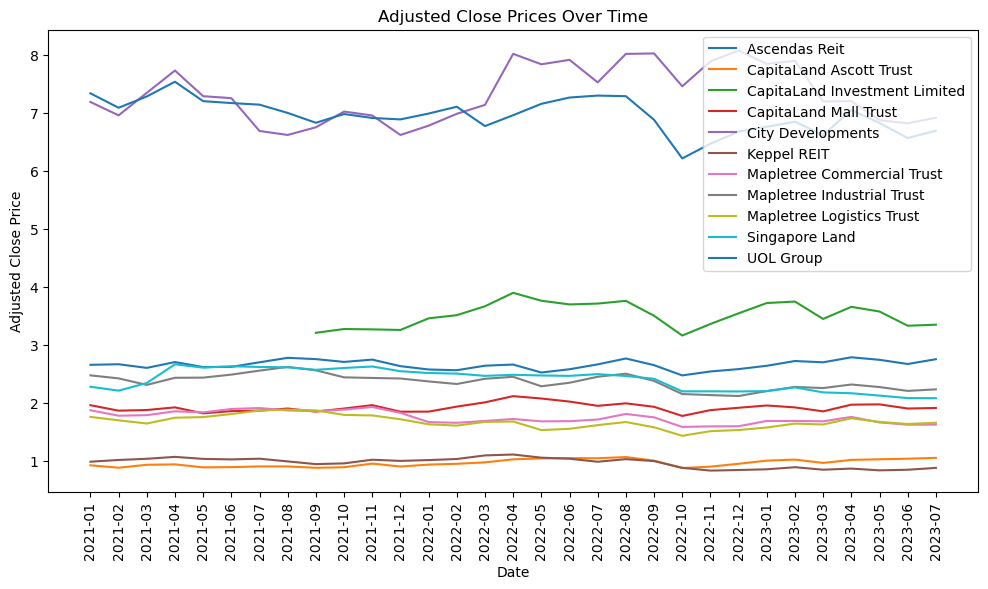

In [57]:
import matplotlib.pyplot as plt


# 获取唯一的公司名称
companies = result['name'].unique()

# 创建一个图形
plt.figure(figsize=(12, 6))

# 为每个公司绘制线图
for company in companies:
    data = result[result['name'] == company]
    plt.plot(data['date'], data['adjusted_close'], label=company)

# 设置图形标题和标签
plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')

# 添加图例
plt.legend()
plt.xticks(rotation=90)
# 显示图形
plt.show()


In [69]:

correlation_df = pd.DataFrame(columns=['Company', 'Correlation'])

# 获取唯一的公司名称
companies = result['name'].unique()

for company in companies:
    stock_data = result[result['name'] == company]
    merged_data = stock_data.merge(unit_psqm, left_on='date', right_on='Unit')
    correlation = merged_data['adjusted_close'].corr(merged_data['Average PSQM'])
    
    # 创建一个包含相关性数据的临时DataFrame
    temp_df = pd.DataFrame({'Company': [company], 'Correlation': [correlation]})
    
    # 使用pandas.concat方法将临时DataFrame添加到主DataFrame中
    correlation_df = pd.concat([correlation_df, temp_df], ignore_index=True)

# 显示结果
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)


print(correlation_df)


                          Company  Correlation
0         CapitaLand Ascott Trust     0.589700
1               City Developments     0.299821
2   CapitaLand Investment Limited     0.125793
3           CapitaLand Mall Trust     0.098976
4                   Ascendas Reit     0.068950
5       Mapletree Logistics Trust    -0.564610
6                       UOL Group    -0.615056
7      Mapletree Commercial Trust    -0.730860
8      Mapletree Industrial Trust    -0.741792
9                  Singapore Land    -0.790502
10                    Keppel REIT    -0.801623


In [47]:
coe_df['year'] = coe_df['year'].astype(str)
month_dict = {
    'january': 1,
    'february': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'august': 8,
    'september': 9,
    'october': 10,
    'november': 11,
    'december': 12
}
coe_df['date'] = pd.to_datetime(coe_df['year'] + '-' + coe_df['month'].astype(str))
# print(coe_df)
result = coe_df.groupby(['category', 'date']).agg({
    'price': 'mean',
    'quota': 'mean',
    'bids': 'mean'
}).reset_index()

# 重命名结果的列名
result.rename(columns={'price': 'average_price', 'quota': 'average_quota', 'bids': 'average_bids'}, inplace=True)

# 打印结果
print(result)

    category       date  average_price  average_quota  average_bids
0          a 2021-01-01        42055.0          964.5        1294.5
1          a 2021-02-01        41500.5          894.0        1162.0
2          a 2021-03-01        43292.5          886.5        1180.5
3          a 2021-04-01        47620.0          886.5        1251.0
4          a 2021-05-01        44901.5          833.5        1154.5
..       ...        ...            ...            ...           ...
119        e 2023-03-01       116010.0          132.0         259.5
120        e 2023-04-01       121745.5          135.5         252.0
121        e 2023-05-01       124501.0          125.0         286.0
122        e 2023-06-01       121944.5          134.5         296.0
123        e 2023-07-01       121555.0          129.5         230.0

[124 rows x 5 columns]


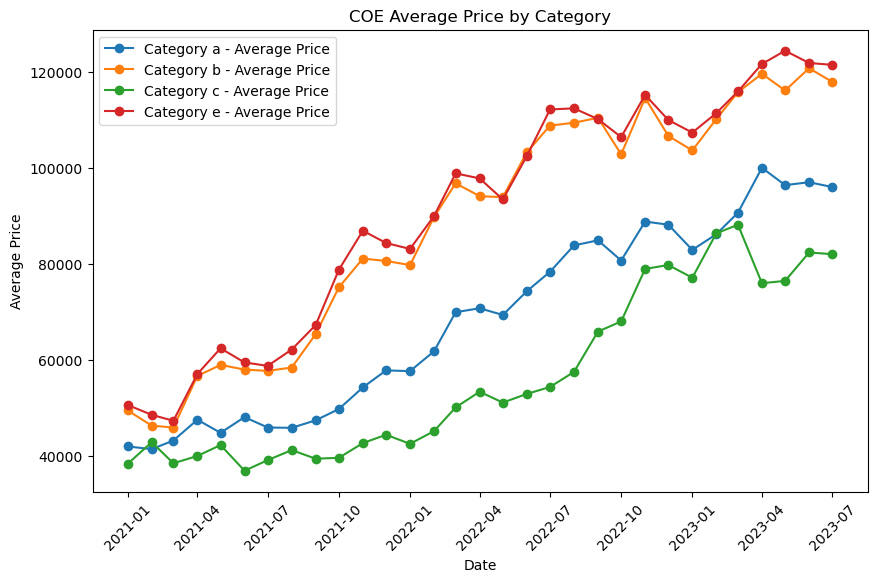

In [48]:
# 选择要绘制的 'category' 列表
selected_categories = ['a', 'b', 'c', 'e']

# 设置图表
fig, ax = plt.subplots(figsize=(10, 6))

# 循环绘制每个 'category' 的数据
for category in selected_categories:
    category_data = result[result['category'] == category]
    ax.plot(category_data['date'], category_data['average_price'], marker='o', label=f'Category {category} - Average Price')

# 设置标签和标题
ax.set_xlabel('Date')
ax.set_ylabel('Average Price')
ax.set_title('COE Average Price by Category')
ax.legend()

# 旋转 x 轴标签以便更好地显示
plt.xticks(rotation=45)

# 显示图表
plt.show()


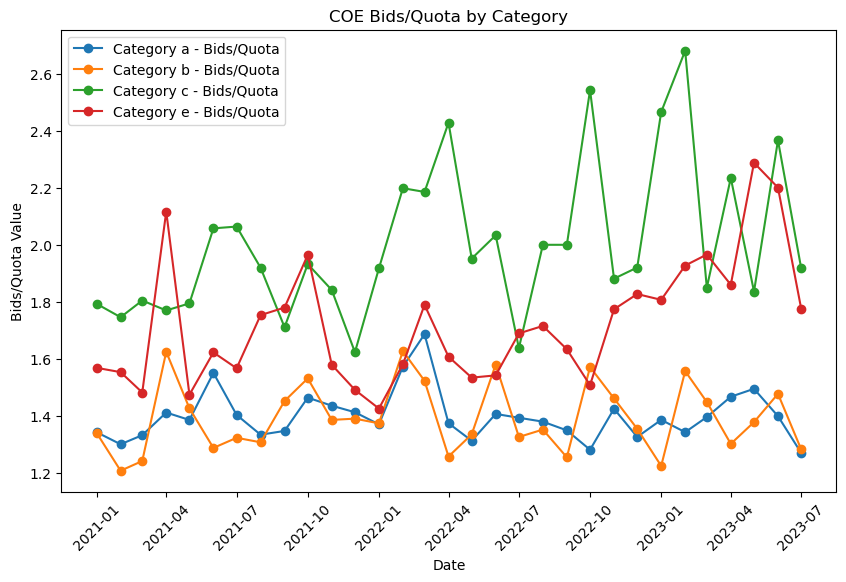

In [49]:
# 创建 'bids/quota' 列
result['bids_quota'] = result['average_bids'] / result['average_quota']

# 选择要绘制的 'category' 列表
selected_categories = ['a', 'b', 'c', 'e']

# 设置图表
fig, ax = plt.subplots(figsize=(10, 6))

# 循环绘制每个 'category' 的数据
for category in selected_categories:
    category_data = result[result['category'] == category]
    ax.plot(category_data['date'], category_data['bids_quota'], marker='o', label=f'Category {category} - Bids/Quota')

# 设置标签和标题
ax.set_xlabel('Date')
ax.set_ylabel('Bids/Quota Value')
ax.set_title('COE Bids/Quota by Category')
ax.legend()

# 旋转 x 轴标签以便更好地显示
plt.xticks(rotation=45)

# 显示图表
plt.show()


In [51]:
# 计算 'price' 与 'psqm' 的相关性
correlation_price_psqm = result['average_price'].corr(unit_psqm['Average PSQM'])

# 计算 'bids/quota' 与 'psqm' 的相关性
correlation_bids_quota_psqm = result['bids_quota'].corr(unit_psqm['Average PSQM'])

# 打印结果
print(f'Correlation between Price and PSQM: {correlation_price_psqm}')
print(f'Correlation between Bids/Quota and PSQM: {correlation_bids_quota_psqm}')


Correlation between Price and PSQM: 0.9705442979849037
Correlation between Bids/Quota and PSQM: -0.11468629674908618
